In [98]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [99]:
# Step 2: Load the dataset
# Assuming you've already uploaded 'inflammation_diagnosis.csv' into the Jupyter environment
# If you manually upload, just ensure the file is in the same directory as the notebook
data = pd.read_csv('inflammation_diagnosis.csv',sep = ';')


In [100]:
 #Step 3: Display first few rows of the data to understand its structure
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   temperature nausea lumbar_pain urine_pushing micturition_pains  \
0         35.5     no         yes            no                no   
1         35.9     no          no           yes               yes   
2         35.9     no         yes            no                no   
3         36.0     no          no           yes               yes   
4         36.0     no         yes            no                no   

  burning_of_urethra inflammation nephritis  
0                 no           no        no  
1                yes          yes        no  
2                 no           no        no  
3                yes          yes        no  
4                 no           no        no  


In [101]:
#Combine 'inflammation' and 'nephritis' into 'disease'
data['disease'] = (data['inflammation'] == 'yes') | (data['nephritis'] == 'yes')

In [102]:
#Drop original 'inflammation' and 'nephritis' columns
data = data.drop(['inflammation', 'nephritis'], axis=1)

In [103]:
#Convert boolean columns to int
bool_columns = ['nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning_of_urethra', 'disease']
data[bool_columns] = data[bool_columns].applymap(lambda x: 1 if x == 'yes' else 0)


C:\Users\JBC\AppData\Local\Temp\ipykernel_8088\527494792.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[bool_columns] = data[bool_columns].applymap(lambda x: 1 if x == 'yes' else 0)


In [104]:
#Convert temperature to float
data['temperature'] = data['temperature'].astype(float)


In [105]:
# Print the first few rows to verify the changes
print(data.head())

   temperature  nausea  lumbar_pain  urine_pushing  micturition_pains  \
0         35.5       0            1              0                  0   
1         35.9       0            0              1                  1   
2         35.9       0            1              0                  0   
3         36.0       0            0              1                  1   
4         36.0       0            1              0                  0   

   burning_of_urethra  disease  
0                   0        0  
1                   1        0  
2                   0        0  
3                   1        0  
4                   0        0  


In [106]:
X = data.drop('disease', axis=1)
y = data['disease']


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# Verify no train samples in test set
assert len(set(X_train.index).intersection(set(X_test.index))) == 0



In [109]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [110]:
# Predict on the test set
y_pred = gnb.predict(X_test)

In [111]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


C:\Users\JBC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


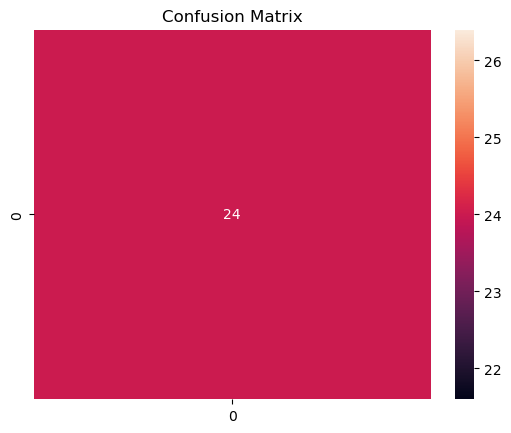

In [112]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

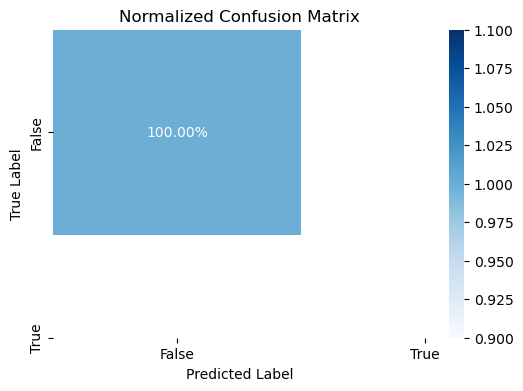

In [113]:
# Normalized Confusion Matrix
import numpy as np
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
